In [0]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
from sklearn.cluster import KMeans

##  Load Real-Time Traffic Speed Data From NYC Open Data. 

Note: The data has  24,226,527 rows. 




1. Draw a plot of the speed to understand the distribution of the speed. 

In [0]:
url = 'https://data.cityofnewyork.us/resource/i4gi-tjb9.csv'
df = pd.read_csv(url, nrows = 1000, usecols = ['id', 'borough','data_as_of', 'speed','link_points','travel_time'])

In [0]:
df.head(1)

,borough,data_as_of,id,link_points,speed,travel_time
0,Brooklyn,2019-04-30T17:33:12.000,259,"40.6756,-74.841 40.67643,-74.001241 40.6772405...",11.8,329


## The distribution of the speed can be seen from the histogram

No handles with labels found to put in legend.


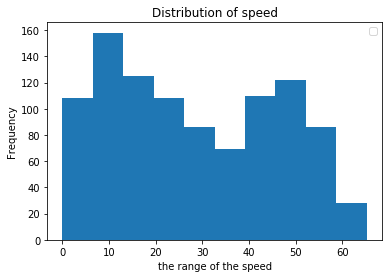

In [0]:
plt.title('Distribution of speed')
plt.hist(df.speed)
plt.xlabel('the range of the speed')
plt.ylabel('Frequency')
plt.legend()

## Further explore the traffic speed data by calculating average speed per time period. 


1. The column - Data_as_of represents the time. Time is accurate to the second. We decided to use minutes as the time period. 

A function to transform the data in the 'data_as_of' column is implemented here:

Example Before Transformation:

In [0]:
df['data_as_of'][0]

'2019-04-30T17:33:12.000'

In [0]:
def turn_format(x):
  hour = pd.to_datetime(x).hour
  mint = pd.to_datetime(x).minute
  return hour + mint / 10

In [0]:
df['data_as_of'] = df['data_as_of'].apply(turn_format)

Example After Transformation:

In [0]:
df['data_as_of'][0]

20.3

In [0]:
speed_min = df.groupby(['data_as_of'])['speed'].mean()

In [0]:
speed_min.head()

data_as_of
17.3    29.623556
17.8    29.618889
18.3    29.389037
18.8    28.638074
19.3    28.021407
Name: speed, dtype: float64

2. After transformation, firstly, we plot the average speed against hour.mint

Text(0, 0.5, 'average speed')

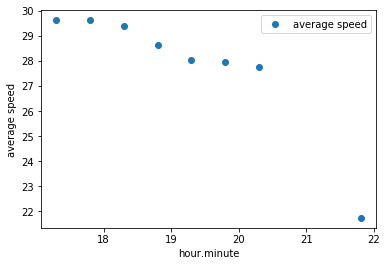

In [0]:
plt.plot(speed_min,'o', label = 'average speed')
plt.legend()
plt.xlabel('hour.minute')
plt.ylabel('average speed')

3. Fit a regression model on x = hour/minute
y = average speed. 

To find the best model order. We use cross-validation to do the model selection problem. 

In [0]:
//continued in the other file